In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from glob import glob
import pandas as pd

In [2]:
json_path = '/preurp/deep-q-learning/logs/'

In [3]:
temp = [y for x in os.walk(json_path) for y in glob(os.path.join(x[0], '*.json'))]

In [4]:
temp.sort()
json_dir = temp

In [5]:
data = {}
for i in range(len(json_dir)):
    with open(json_dir[i]) as json_file:
        data[i] = json.load(json_file)
start_epi = 2

In [20]:
acc_step = {}
loss_step = {}
acc_epi = {}
loss_epi = {}

for trial in range(len(json_dir)):
    epi_num = len(data[trial].keys()) - 2
    if epi_num > 100:
        epi_num = 100
    for i in range(start_epi, epi_num):
        epi = str(i)
        if i == start_epi:
            acc_step[trial] = np.zeros(0)
            loss_step[trial] = np.zeros(0)
            acc_epi[trial] = np.zeros(epi_num-start_epi)
            loss_epi[trial] = np.zeros(epi_num-start_epi)
        data_arr = np.array(data[trial][epi])
        acc_step[trial] = np.concatenate((acc_step[trial], data_arr[:,0]), axis=0)
        loss_step[trial] = np.concatenate((loss_step[trial], data_arr[:,1]), axis=0)
        
        acc_epi[trial][i-start_epi] = np.mean(data_arr[:,0])
        loss_epi[trial][i-start_epi] = np.mean(data_arr[:,1])

# Mean Score, Accuracy, and Loss along Trial

In [7]:
idx_name = {}
for i in range(len(acc_epi.keys())):
    label = json_dir[i].split('history_')[-1].split('.')[0]
    idx_name[i] = label

In [8]:
"""
Total_statistics = {}
keys = ['Mean Accuracy', 'Acc Std', 'Mean Loss', 'Loss Std', 'Mean Score', 'Score Std']
Total_statistics = dict.fromkeys(keys, [])
"""
keys = ['Mean Accuracy', 'Acc Std', 'Mean Loss', 'Loss Std', 'Mean Score', 'Score Std']
Total_statistics = {}

for i in range(len(keys)):
    Total_statistics[keys[i]] = []




In [9]:
for i in range(len(acc_epi.keys())):
    Total_statistics[keys[0]].append(np.mean(acc_epi[i]))
    Total_statistics[keys[1]].append(np.std(acc_epi[i]))
    Total_statistics[keys[2]].append(np.mean(loss_epi[i]))
    Total_statistics[keys[3]].append(np.std(loss_epi[i]))
    Total_statistics[keys[4]].append(np.mean(np.array(data[i]['score'])))
    Total_statistics[keys[5]].append(np.std(np.array(data[i]['score'])))

In [10]:
TotalPd = pd.DataFrame(Total_statistics, columns=keys)

## Statistics

In [11]:
TotalPd.rename(index=idx_name)

,Mean Accuracy,Acc Std,Mean Loss,Loss Std,Mean Score,Score Std
test1,0.821080,0.031158,0.210795,0.092498,22.6,12.877888
test2,0.683585,0.040882,0.241176,0.029068,24.8,11.973304


# Training Accuracy along Steps

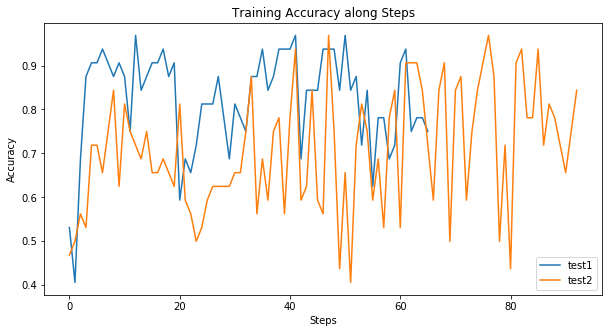

In [12]:
# acc_step plot
fig = plt.figure(figsize=(10,5))

for i in range(len(acc_step.keys())):
    label = json_dir[i].split('history_')[-1].split('.')[0]
    plt.plot(acc_step[i], label='{}'.format(label))

plt.legend()
plt.title("Training Accuracy along Steps")
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.show()

# Training Accuracy along Steps (Separated)

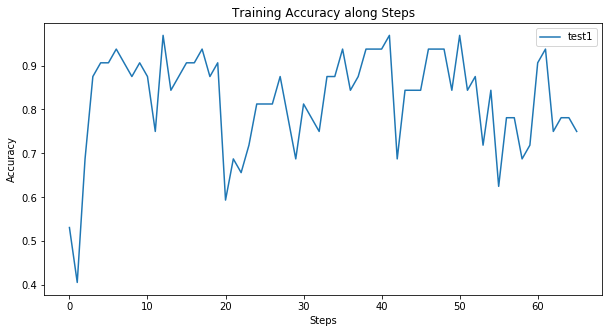

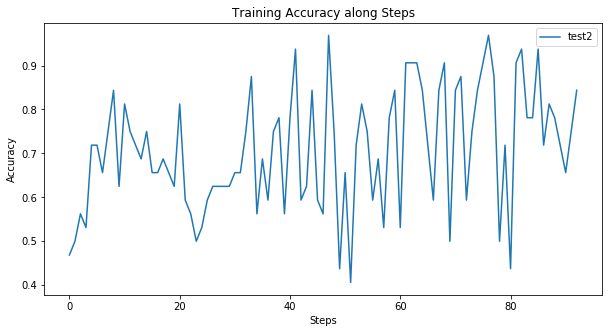

In [13]:
# acc_step plot
for i in range(len(acc_step.keys())):
    fig = plt.figure(figsize=(10,5))
    label = json_dir[i].split('history_')[-1].split('.')[0]
    plt.plot(acc_step[i], label='{}'.format(label))
    plt.legend()
    plt.title("Training Accuracy along Steps")
    plt.xlabel("Steps")
    plt.ylabel("Accuracy")
    plt.show()

# Training Loss along Steps

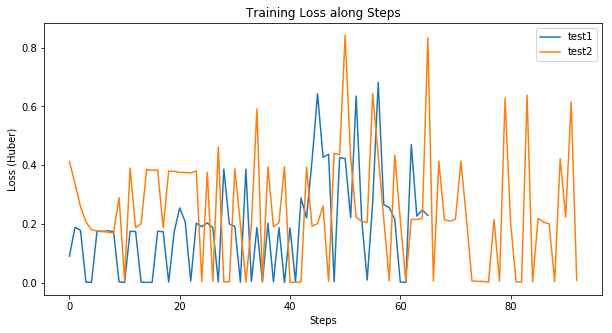

In [14]:
# loss_step plot
fig = plt.figure(figsize=(10,5))

for i in range(len(loss_step.keys())):
    label = json_dir[i].split('history_')[-1].split('.')[0]
    plt.plot(loss_step[i], label='{}'.format(label))

plt.legend()
plt.title("Training Loss along Steps")
plt.xlabel("Steps")
plt.ylabel("Loss (Huber)")
plt.show()

# Training Loss along Steps (Separated)

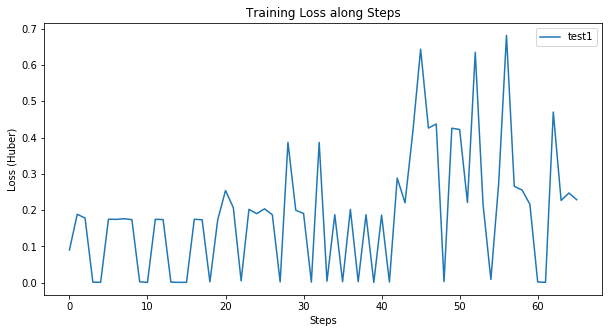

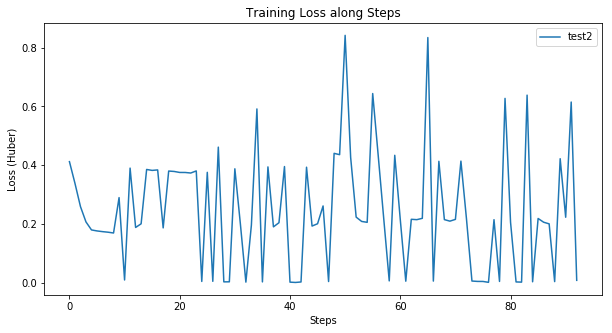

In [15]:
# loss_step plot
for i in range(len(loss_step.keys())):
    fig = plt.figure(figsize=(10,5))
    label = json_dir[i].split('history_')[-1].split('.')[0]
    plt.plot(loss_step[i], label='{}'.format(label))

    plt.legend()
    plt.title("Training Loss along Steps")
    plt.xlabel("Steps")
    plt.ylabel("Loss (Huber)")
    plt.show()

# Training Accuracy along Episodes

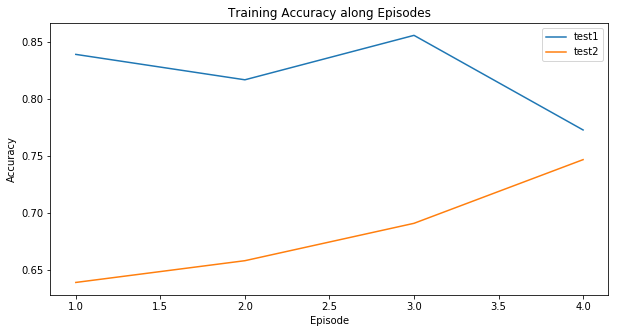

In [16]:
# acc_epi plot
fig = plt.figure(figsize=(10,5))

for i in range(len(acc_epi.keys())):
    label = json_dir[i].split('history_')[-1].split('.')[0]
    epi_tick = np.arange(start_epi,len(acc_epi[i])+start_epi)
    plt.plot(epi_tick, acc_epi[i], label='{}'.format(label))

plt.legend()
plt.title("Training Accuracy along Episodes")
plt.xlabel("Episode")
plt.ylabel("Accuracy")
plt.show()

# Training Loss along Episodes

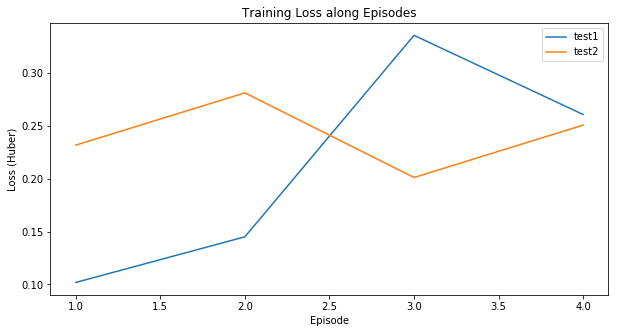

In [17]:
# loss_epi plot
fig = plt.figure(figsize=(10,5))

for i in range(len(acc_step.keys())):
    label = json_dir[i].split('history_')[-1].split('.')[0]
    epi_tick = np.arange(start_epi,len(loss_epi[i])+start_epi)
    plt.plot(epi_tick, loss_epi[i], label='{}'.format(label))

plt.legend()
plt.title("Training Loss along Episodes")
plt.xlabel("Episode")
plt.ylabel("Loss (Huber)")
plt.show()

# Score along Episodes

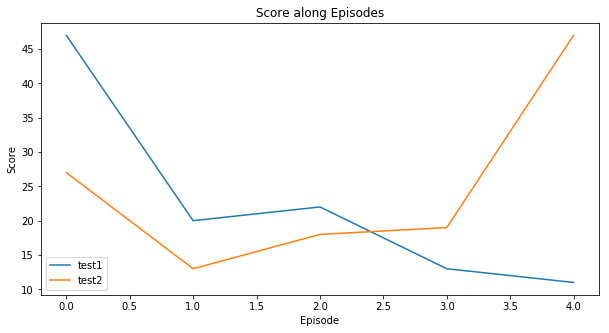

In [18]:
fig = plt.figure(figsize=(10,5))

for trial in range(len(data.keys())):
    label = json_dir[trial].split('history_')[-1].split('.')[0]
    plt.plot(data[trial]["score"], label="{}".format(label))
    
plt.legend()
plt.title("Score along Episodes")
plt.xlabel("Episode")
plt.ylabel("Score")
plt.show()

# Epsilon along Episodes

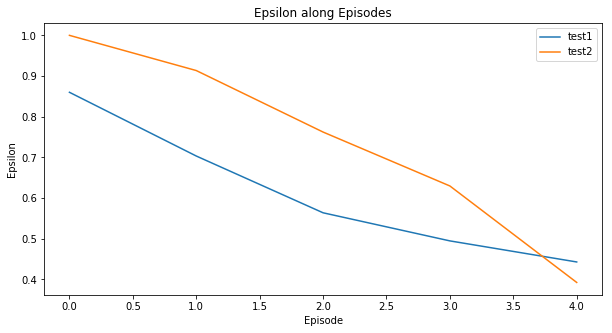

In [19]:
fig = plt.figure(figsize=(10,5))

for trial in range(len(data.keys())):
    label = json_dir[trial].split('history_')[-1].split('.')[0]
    plt.plot(data[trial]["epsilon"], label="{}".format(label))
    
plt.legend()
plt.title("Epsilon along Episodes")
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.show()